In [87]:
import sys
print('Python:{}'.format(sys.version))
import scipy
print('Scipy:{}'.format(scipy.__version__))
import numpy
print('Numpy:{}'.format(numpy.__version__))
import pandas
print('Pandas:{}'.format(pandas.__version__))
import matplotlib
print('Matplotlib:{}'.format(matplotlib.__version__))

Python:3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scipy:1.4.1
Numpy:1.18.1
Pandas:1.0.1
Matplotlib:3.1.3


In [88]:
import pandas
from pandas.plotting import scatter_matrix
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [89]:
#loading the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal:length', 'sepal-width','petal-length','petal-width','class']
dataset = read_csv(url,names = names)

In [90]:
#Dimensions of the datasets
print(dataset.shape)

(150, 5)


In [91]:
#take a peek at the data
print(dataset.head(20))

    sepal:length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [92]:
#statistical summary
print(dataset.describe())

       sepal:length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [93]:
#class distribution
print (dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


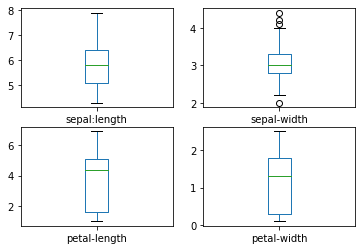

In [94]:
#univariate plots-box and whisker plots
dataset.plot(kind='box',subplots=True, layout =(2,2), sharex = False, sharey = False)
pyplot.show()

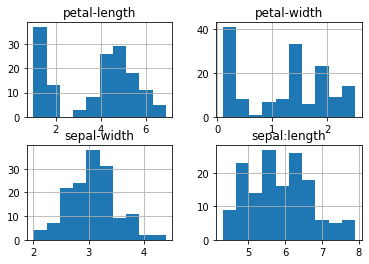

In [95]:
#Histrogram of variables
dataset.hist()
pyplot.show()

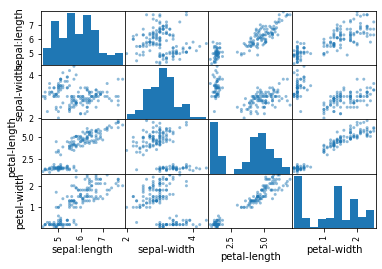

In [96]:
#multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [97]:
#step 1
#creating validation dataset
#spliting dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train , X_validation, Y_train,Y_validation=train_test_split(X,Y,test_size = 0.2, random_state= None)

In [98]:
#Building Model
models = []
models.append(('LR',LogisticRegression(solver = 'liblinear',multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [99]:
#evaluate the created models
results = []
names = []
for name,model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state= None )
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))

LR: 0.933333 (0.072648)
LDA: 0.983333 (0.033333)
KNN: 0.975000 (0.038188)
NB: 0.950000 (0.066667)
SVM: 0.975000 (0.038188)


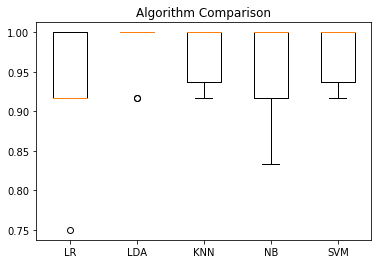

In [100]:
#compare the models
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [110]:
#make prediction on data
model =SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [111]:
#evaluate our prediction
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9666666666666667
[[ 6  0  0]
 [ 0 13  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

